In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [3]:
team_name = 'Norwich City'
team_name_dash = team_name.replace(' ', '-')
team_id = '1c781004'
player_name = 'Adam Idah'
player_name_dash = player_name.replace(' ', '-')
player_id = '291e3ec3'
league_name = 'Championship'
league_name_dash = league_name.replace(' ', '-')
league_id = 10
year_range = '2023-2024'
badges = 'No'

In [4]:
df_team = pd.read_html(f'https://fbref.com/en/squads/{team_id}/{year_range}/matchlogs/c{league_id}/schedule/{team_name_dash}-Scores-and-Fixtures-{league_name_dash}', attrs = {"id" : "matchlogs_for"})[0]

In [5]:
df_player = pd.read_html(f'https://fbref.com/en/players/{player_id}/matchlogs/{year_range}/c{league_id}/{player_name_dash}-Match-Logs', attrs = {"id" : f"matchlogs_{year_range}_{league_id}"})[0]

In [6]:
df_player.columns = df_player.columns.droplevel(0)
df_player.dropna(subset = ['Date'], inplace = True)

In [7]:
df_team.dropna(subset = ['Date'], inplace = True)

In [8]:
df = pd.merge(df_team, df_player, on = 'Date', how = 'outer')

In [9]:
pd.set_option('display.max_columns', None)
df = df[['Date','Opponent_x','Round_x','xG_x','xGA','Min']]

In [10]:
df['xGD'] = df['xG_x'] - df['xGA']
df.drop(columns=['xG_x','xGA'], inplace = True)

In [11]:
df['Min'].fillna(0, inplace = True)
for i in range(len(df)):
    try:
        df.at[i, 'Min'] = float(df['Min'][i])
    except ValueError:
        if "did not play" in str(df['Min'][i]).lower():
            df.at[i, 'Min'] = 0
        else:
            # If it's not a recognizable string, we'll set it to NaN
            df.at[i, 'Min'] = float('nan')

In [12]:
played = []
for i in df['Min']:
    if i > 30:
        played.append('Yes')
    else:
        played.append('No')
df['Played'] = played

In [13]:
df['Match'] = range(1, len(df) + 1)

In [14]:
minutes = df['Min'].sum()

In [15]:
df['Opponent Badge'] = df['Opponent_x'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [16]:
df

,Date,Opponent_x,Round_x,Min,xGD,Played,Match,Opponent Badge
0,2023-08-05,Hull City,Matchweek 1,5.0,2.2,No,1,C:/Users/George/Documents/Football Analytics/T...
1,2023-08-12,Southampton,Matchweek 2,4.0,-1.7,No,2,C:/Users/George/Documents/Football Analytics/T...
2,2023-08-20,Millwall,Matchweek 3,11.0,1.2,No,3,C:/Users/George/Documents/Football Analytics/T...
3,2023-08-26,Huddersfield,Matchweek 4,71.0,1.5,Yes,4,C:/Users/George/Documents/Football Analytics/T...
4,2023-09-02,Rotherham Utd,Matchweek 5,76.0,0.9,Yes,5,C:/Users/George/Documents/Football Analytics/T...
5,2023-09-16,Stoke City,Matchweek 6,59.0,0.0,Yes,6,C:/Users/George/Documents/Football Analytics/T...
6,2023-09-20,Leicester City,Matchweek 7,37.0,-1.4,Yes,7,C:/Users/George/Documents/Football Analytics/T...
7,2023-09-23,Plymouth Argyle,Matchweek 8,90.0,-1.3,Yes,8,C:/Users/George/Documents/Football Analytics/T...
8,2023-09-30,Birmingham City,Matchweek 9,66.0,0.2,Yes,9,C:/Users/George/Documents/Football Analytics/T...
9,2023-10-04,Swansea City,Matchweek 10,33.0,-0.9,Yes,10,C:/Users/George/Documents/Football Analytics/T...


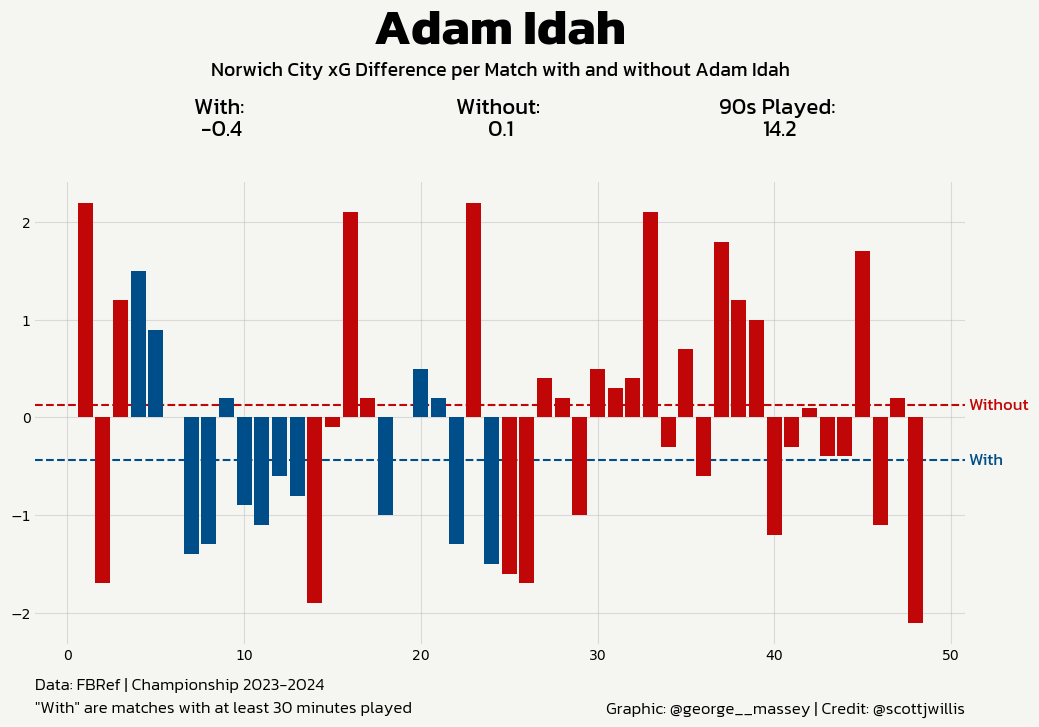

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#F5F6F1')
fig.patch.set_facecolor('#F5F6F1')
bars = ax.bar(df['Match'], df['xGD'], color=df['Played'].map({'Yes': '#004E89', 'No': '#C00606'}), zorder=3, width=0.85)

if badges == 'Yes':
    for i, bar in enumerate(bars):
        opponent_name = df.loc[i, 'Opponent_x']
        badge_path = df.loc[i, 'Opponent Badge']
        image = mpimg.imread(badge_path)
        if opponent_name == 'Swansea City':
            imagebox = OffsetImage(image, zoom=0.02)
        else:
            imagebox = OffsetImage(image, zoom=0.08)
        y_coordinate = bar.get_height() + 0.2 if df.loc[i, 'xGD'] > 0 else bar.get_height() - 0.2
        ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, y_coordinate), frameon=False)
        ax.add_artist(ab)
else:
    pass

df_with = df[df['Played'] == 'Yes']
df_without = df[df['Played'] == 'No']
ax.grid(axis='both', linestyle='-', alpha=0.4, zorder=1)
ax.axhline(y=df_with['xGD'].mean(), color='#004E89', linestyle='--', label='With', zorder=2)
ax.axhline(y=df_without['xGD'].mean(), color='#C00606', linestyle='--', label='Without')

# Remove all the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', length=0)  # Remove x-axis tick marks
ax.tick_params(axis='y', length=0)  # Remove y-axis tick marks

plt.text(0.5,1.3, f"{player_name}", ha = 'center',fontsize=36, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0.5,1.23, f"{team_name} xG Difference per Match with and without {player_name}", ha = 'center',fontsize=14, transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.2, 1.1, f"With: \n{df_with['xGD'].mean():.1f}", fontsize=16, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.5, 1.1, f"Without: \n{df_without['xGD'].mean():.1f}", fontsize=16, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.8, 1.1, f"90s Played: \n{(minutes/90):.1f}", fontsize=16, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)


plt.text(0, -0.1, f"Data: FBRef | {league_name} {year_range}", ha = 'left',fontsize=12, transform=plt.gca().transAxes, fontproperties=light)
plt.text(0, -0.15, f"\"With\" are matches with at least 30 minutes played", ha = 'left',fontsize=12, transform=plt.gca().transAxes, fontproperties=light)
plt.text(1, -0.15, f"Graphic: @george__massey | Credit: @scottjwillis", ha = 'right',fontsize=12, transform=plt.gca().transAxes, fontproperties=light)

max_x_value = df['Match'].max()

# Calculate the y-coordinates for the labels
y_with = df_with['xGD'].mean()
y_without = df_without['xGD'].mean()

# Use ax.text() to place the labels. Adjust the x-coordinate as needed to position the labels to the right of the plot.
# You might need to adjust the x-coordinate (e.g., max_x_value + 1) depending on your data.
ax.text(max_x_value + 3, y_with, 'With', color='#004E89', verticalalignment='center', horizontalalignment='left', fontproperties=regular, fontsize=12)
ax.text(max_x_value + 3, y_without, 'Without', color='#C00606', verticalalignment='center', horizontalalignment='left', fontproperties=regular, fontsize=12)

plt.show()

In [22]:
if badges == 'Yes':
    fig.savefig(
        f'C:/Users/George/Documents/Football Analytics/Visuals/{team_name} xG Difference per Match with and without {player_name} with badges.png',
        bbox_inches='tight', 
        dpi=300)
else:
    fig.savefig(
        f'C:/Users/George/Documents/Football Analytics/Visuals/{team_name} xG Difference per Match with and without {player_name}.png',
        bbox_inches='tight', 
        dpi=300)